# Importing Required Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Importing training data

In [3]:
training_data = pd.read_csv("train.csv")
X_train = training_data.drop("Crime_Category", axis = 1)
y_train = training_data["Crime_Category"]

# Importing Test Data

In [4]:
X_test = pd.read_csv("test.csv")

# Exploratory Data Analysis

In [5]:
print(X_train.shape)
print(X_test.shape)

(20000, 21)
(5000, 21)


In [6]:
training_data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [7]:
training_data.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [8]:
X_test.isnull().sum()

Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64

## Features to Drop
`Area Name`: Same as Area ID

`Premise Description`: Same as Premise Code

`Weapon Description`, `Weapon Used Code`, `Cross Street`: Too many null values

`Status Description`: Same as status

`Location`: Similar to Latitude and Logitude


## Nature of Columns
Numerical Columns: `Latitude`, `Longitude`, `Victim_Age`, `Time_Occurred`, `Reporting_District_no`, `Premise_Code`

Text Columns (to be converted to numerical): `Date_Reported`, `Date_Occurred`

Categorical: `Area_ID`, `Part 1-2`, `Victim_Sex`, `Victim_Descent`, `Status`

Since the problem is a multi-class classification one, `Crime_Category` (target) can be encoded using `LabelEncoder

## Missing Values
`Victim_Sex` and `Victim_Descent` contain null values that need to be imputed.

`Victim_Age` contains negative values that need to be treated as null values

`Latitude` and `Longitude` have zero values that need to be dealt with

## Analysis of Target Column

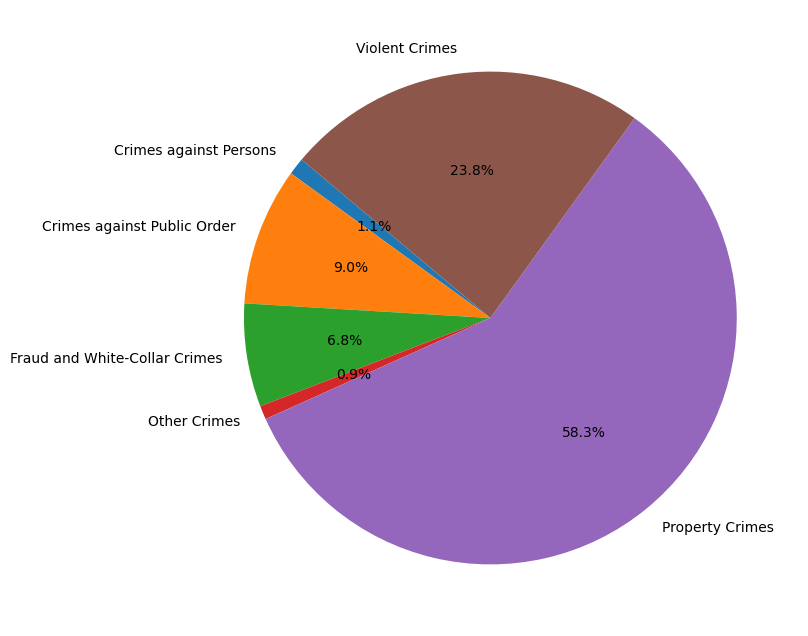

In [9]:
categories, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.show()

As the pie chart shows, the majority of crimes committed are property crimes, with violent crimes getting a solid share as well.

## Visualising Numerical Columns

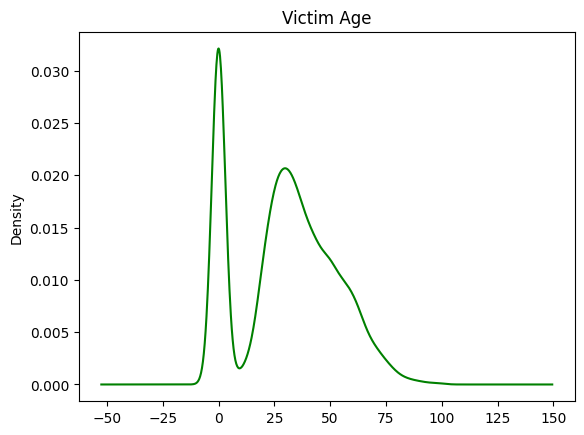

In [10]:
X_train["Victim_Age"].plot.density(color="green")
plt.title("Victim Age")
plt.show()

There a a few negative and 0 values which will need to be imputed. Other wise, it a follows normal distribution.

## Visualising Date Columns

In [11]:
day_occurred = np.array(pd.to_datetime(X_train["Date_Occurred"], format='%m/%d/%Y %I:%M:%S %p').apply(lambda x: x.weekday()))
month_occurred = np.array(pd.to_datetime(X_train["Date_Occurred"], format='%m/%d/%Y %I:%M:%S %p').apply(lambda x: x.month))

In [12]:
day_totals = []
days = [0, 1, 2, 3, 4, 5, 6]
for day in days:
    day_totals.append(len(day_occurred[day_occurred == day]))

month_totals = []
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for month in months:
    month_totals.append(len(month_occurred[month_occurred == month]))

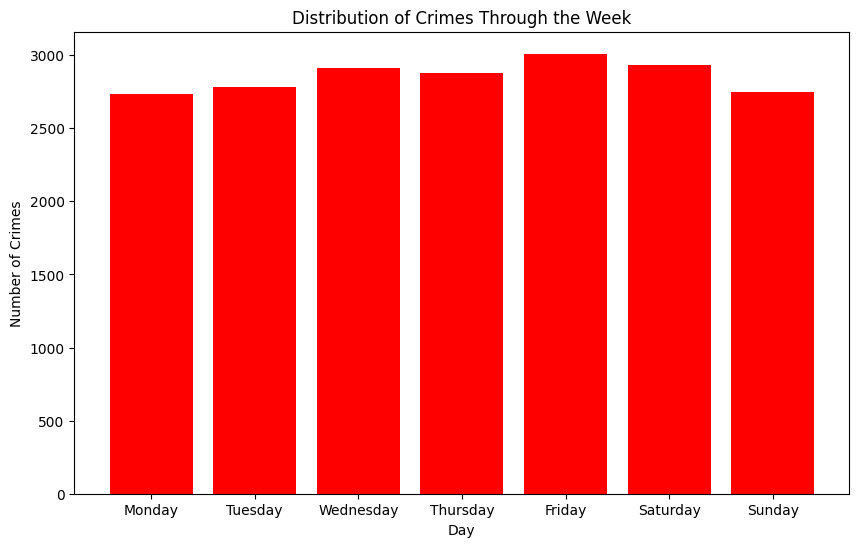

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], day_totals, color="red")
plt.title("Distribution of Crimes Through the Week")
plt.xlabel("Day")
plt.ylabel("Number of Crimes")
plt.show()

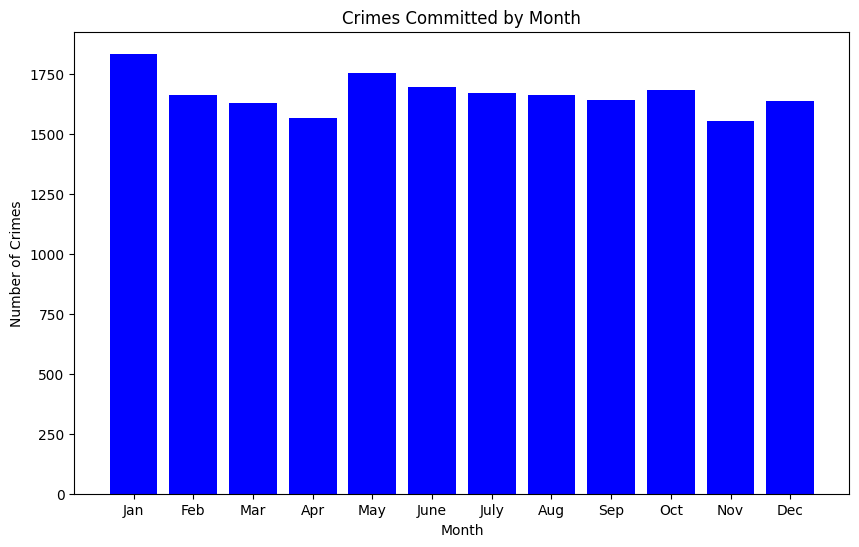

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"], month_totals, color="blue")
plt.title("Crimes Committed by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()

- The above two charts show us that crimes are well-distributed across days of the week and months, showing no particular bias to any day or month.
- Fridays and January, however, have eked out a small lead over their rivals.

## Visualising Latitude and Logitude

A scatter plot of `Latitude` and `Longitude` is plotted below.

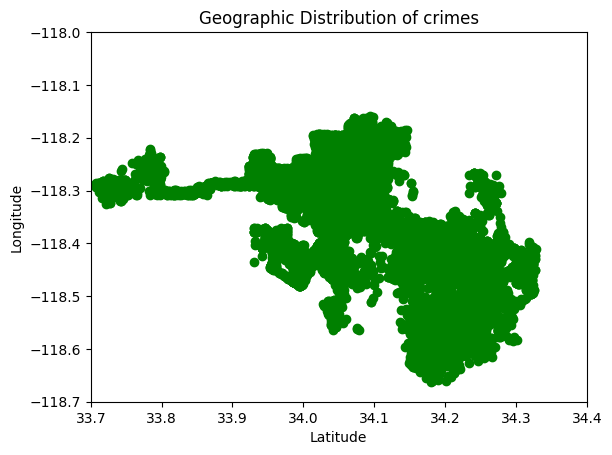

In [15]:
plt.scatter(x = X_train["Latitude"], y = X_train["Longitude"], c="green")
plt.xlim(33.7, 34.4)
plt.ylim(-118.7, -118)
plt.title("Geographic Distribution of crimes")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

The scatter plot shows us that crimes seem to be relatively well distributed across the city. However, there are several rows in which both Latitude and Longitude are 0. These must be addressed in the preprocessing steps

## Visualising Categorical Variables

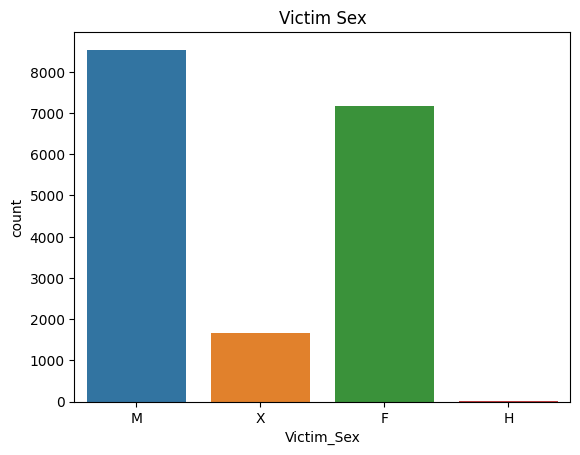

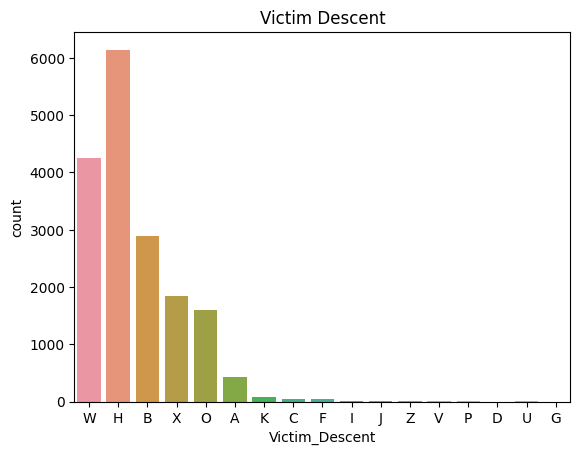

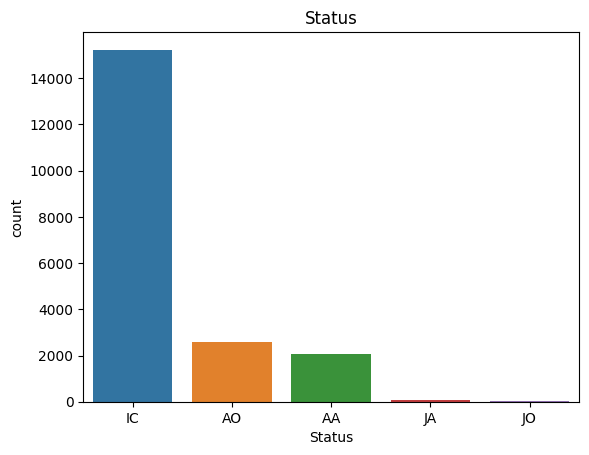

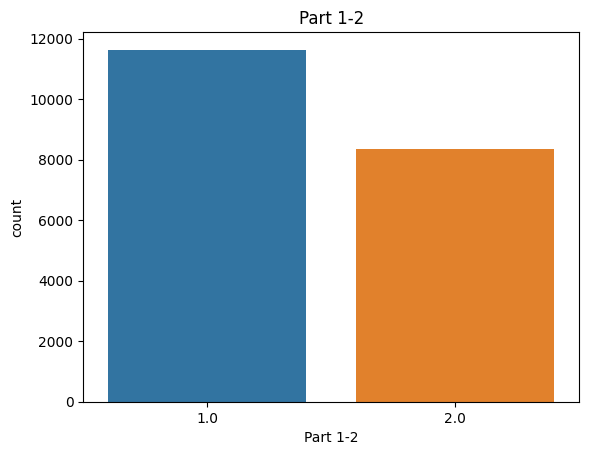

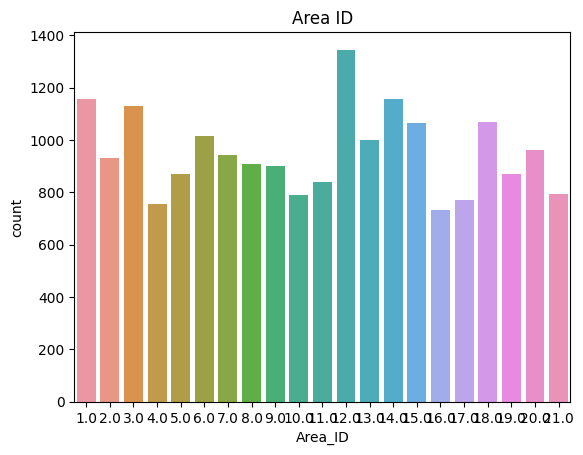

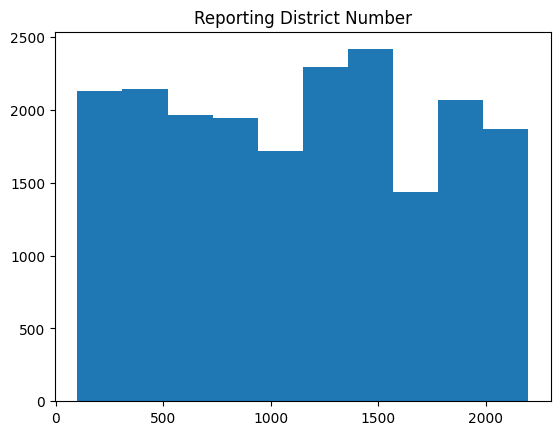

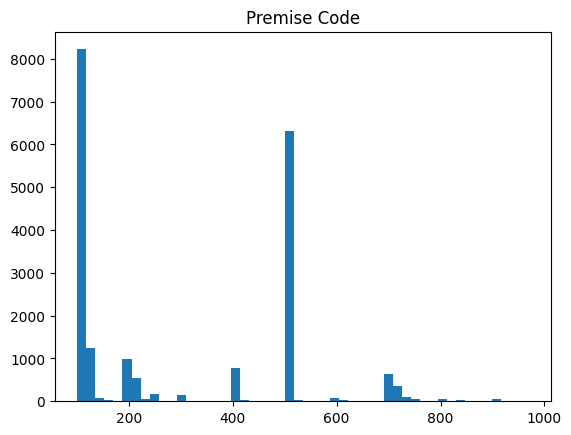

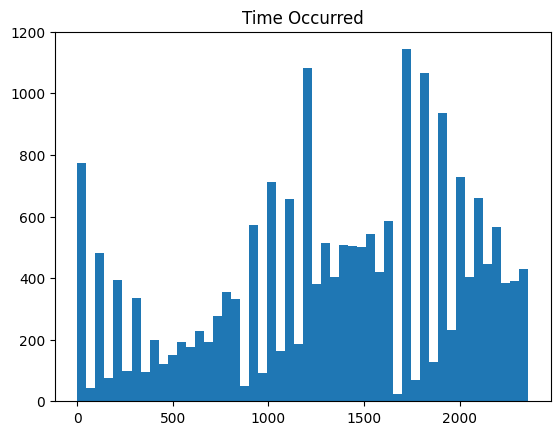

In [16]:
sns.countplot(x = "Victim_Sex", data = X_train)
plt.title("Victim Sex")
plt.show()

sns.countplot(x = "Victim_Descent", data = X_train)
plt.title("Victim Descent")
plt.show()

sns.countplot(x = "Status", data = X_train)
plt.title("Status")
plt.show()

sns.countplot(x = "Part 1-2", data = X_train)
plt.title("Part 1-2")
plt.show()

sns.countplot(x = "Area_ID", data = X_train)
plt.title("Area ID")
plt.show()

plt.hist(X_train["Reporting_District_no"], bins = 10)
plt.title("Reporting District Number")
plt.show()

plt.hist(X_train["Premise_Code"], bins = 50)
plt.title("Premise Code")
plt.show()

plt.hist(X_train["Time_Occurred"], bins = 50)
plt.title("Time Occurred")
plt.show()

- Crimes are committed relatively uniformly across genders and ethnic backgrounds.
- Their status however, is in favour of the "IC" category.
- As the Latitude and Longitude scatter plot suggested, the Area_ID plot also suggests that crimes are committed uniformly in different regions.
- However, the premise codes are heavily dominated by a few select codes.
- Crimes are committed somewhat uniformly through the day, with some periods having higher spikes.

# Preprocessing

## Imports

In [17]:
# Classes required to transform the data to convert categorical data to numerical form and scale numerical columns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# Converts text data to numerical based on the 'words' in the text
from sklearn.feature_extraction.text import CountVectorizer

## Transforming target column 

In [18]:
lab_enc = LabelEncoder()
y_train = lab_enc.fit_transform(y_train)

## Dropping Required Columns

In [19]:
X_train.drop(["Area_Name", "Premise_Description", "Weapon_Description", "Status_Description","Cross_Street", "Weapon_Used_Code", "Location"], axis = 1, inplace = True)
X_test.drop(["Area_Name", "Premise_Description", "Weapon_Description", "Status_Description", "Cross_Street", "Weapon_Used_Code", "Location"], axis = 1, inplace = True)

## Converting Date Columns to Suitable Format

### Date Reported

In [20]:
X_train["Date_Reported"] = pd.to_datetime(X_train["Date_Reported"], format = "%m/%d/%Y %I:%M:%S %p")
X_train["Date_Reported"] = X_train["Date_Reported"].apply(lambda x: int(x.timestamp()))

X_test["Date_Reported"] = pd.to_datetime(X_test["Date_Reported"], format = "%m/%d/%Y %I:%M:%S %p")
X_test["Date_Reported"] = X_test["Date_Reported"].apply(lambda x: int(x.timestamp()))

### Date Occurred

In [21]:
X_train["Date_Occurred"] = pd.to_datetime(X_train["Date_Occurred"], format = "%m/%d/%Y %I:%M:%S %p")
X_train["Date_Occurred"] = X_train["Date_Occurred"].apply(lambda x: int(x.timestamp()))

X_test["Date_Occurred"] = pd.to_datetime(X_test["Date_Occurred"], format = "%m/%d/%Y %I:%M:%S %p")
X_test["Date_Occurred"] = X_test["Date_Occurred"].apply(lambda x: int(x.timestamp()))

### Dropping Original Columns

## Dealing with Missing Values

In [22]:
X_train[(X_train["Latitude"] == 0) & (X_train["Longitude"] == 0)].shape

(78, 14)

### Latitude and Logitude
- There are several columns for which latitude and longitude are both 0. This represents the Null Island, off the coast of Guinea. It's very unlikely that this dataset is focused on that location as all the other coordinates are very different. Hence, the zero values will be imputed.
- If we impute the 0 values, the coordinates of the data indicates that the data is taken from Los Angeles, USA.

In [23]:
X_train["Latitude"] = X_train["Latitude"].apply(lambda x: np.nan if x <= 0 else x) 
X_test["Latitude"] = X_test["Latitude"].apply(lambda x: np.nan if x <= 0 else x)

mean_lat = X_train["Latitude"].mean()

X_train["Latitude"] = X_train["Latitude"].fillna(mean_lat)
X_test["Latitude"] = X_test["Latitude"].fillna(mean_lat)

In [24]:
X_train["Longitude"] = X_train["Longitude"].apply(lambda x: np.nan if x <= 0 else x) 
X_test["Longitude"] = X_test["Longitude"].apply(lambda x: np.nan if x <= 0 else x)

mean_long = X_train["Longitude"].mean()

X_train["Longitude"] = X_train["Longitude"].fillna(mean_lat)
X_test["Longitude"] = X_test["Longitude"].fillna(mean_lat)

### Victim Age
Replacing negative values in `Victim_Age` to null to enable imputation. The now null values will be replaced with the median.

In [25]:
X_train["Victim_Age"] = X_train["Victim_Age"].apply(lambda x: np.nan if x <= 0 else x) 
X_test["Victim_Age"] = X_test["Victim_Age"].apply(lambda x: np.nan if x <= 0 else x)

median_age = X_train["Victim_Age"].median()

X_train["Victim_Age"] = X_train["Victim_Age"].fillna(median_age)
X_test["Victim_Age"] = X_test["Victim_Age"].fillna(median_age)

### Victim Sex, Victim Descent, Modus Operandi
Since these are categorical values, their most frequent values will be taken to fill the missing ones.

In [26]:
most_frequent_sex = X_train["Victim_Sex"].mode()[0]
X_train["Victim_Sex"] = X_train["Victim_Sex"].fillna(most_frequent_sex)
X_test["Victim_Sex"] = X_test["Victim_Sex"].fillna(most_frequent_sex)

most_frequent_descent = X_train["Victim_Descent"].mode()[0]
X_train["Victim_Descent"] = X_train["Victim_Descent"].fillna(most_frequent_descent)
X_test["Victim_Descent"] = X_test["Victim_Descent"].fillna(most_frequent_descent)

most_frequent_modus = X_train["Modus_Operandi"].mode()[0]
X_train["Modus_Operandi"] = X_train["Modus_Operandi"].fillna(most_frequent_modus)
X_test["Modus_Operandi"] = X_test["Modus_Operandi"].fillna(most_frequent_modus)

## Categorizing Variables based on type for preprocessing

In [27]:
X_train.head()

,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status
0,34.1522,34.073591,1583712000,1583452800,1800.0,15.0,1563.0,1.0,0385,75.0,M,W,101.0,IC
1,34.0028,34.073591,1582761600,1582761600,1345.0,13.0,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,IC
2,34.0111,34.073591,1597968000,1597968000,605.0,13.0,1343.0,2.0,0329 1202,67.0,M,B,501.0,IC
3,34.2953,34.073591,1604793600,1604620800,1800.0,19.0,1924.0,1.0,0329 1300,61.0,M,H,101.0,IC
4,33.9787,34.073591,1582588800,1582588800,1130.0,12.0,1245.0,1.0,0416 0945 1822 0400 0417 0344,37.0,X,X,401.0,IC


In [28]:
numerical = ["Latitude", "Longitude", "Victim_Age", "Time_Occurred", "Date_Reported", "Date_Occurred",
            "Reporting_District_no", "Premise_Code"]
categorical = ["Area_ID", "Part 1-2", "Victim_Sex", "Victim_Descent", "Status"]

- The time and date columns could be categorical as well, but I have chosen to treat them as numerical columns.

## Scaling Numerical Columns

In [29]:
scaler = StandardScaler().set_output(transform = "pandas")

In [30]:
X_train_num = scaler.fit_transform(X_train[numerical])
X_test_num = scaler.transform(X_test[numerical])

## Encoding Categorical Columns

In [31]:
onehot_enc = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = "pandas")

In [32]:
X_train_cat = onehot_enc.fit_transform(X_train[categorical])
X_test_cat = onehot_enc.transform(X_test[categorical])

## Vectorizing `Modus_Operandi`
- This column represents the past crimes committed by the criminal in each row. Each such crime is denoted as four digit number in String form. We can use the `count_vectorizer` class, which is used to deal with text data, since each past crime can be treated as a 'word'.

In [33]:
vectorizer = CountVectorizer()

In [34]:
train_modus = vectorizer.fit_transform(X_train["Modus_Operandi"]).toarray()
test_modus = vectorizer.transform(X_test["Modus_Operandi"]).toarray()

In [35]:
X_train_mod = pd.DataFrame(data = train_modus, columns = vectorizer.get_feature_names_out())
X_test_mod = pd.DataFrame(data = test_modus, columns = vectorizer.get_feature_names_out())

## Concatenating all 3 parts

In [36]:
X_train_final = pd.concat([X_train_num, X_train_cat, X_train_mod], axis = 1)
X_test_final = pd.concat([X_test_num, X_test_cat, X_test_mod], axis = 1)

In [37]:
X_train_final.head()

,Latitude,Longitude,Victim_Age,Time_Occurred,Date_Reported,Date_Occurred,Reporting_District_no,Premise_Code,Area_ID_1.0,Area_ID_2.0,...,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999
0,0.694330,7.105427e-15,2.606813,0.692819,-0.869817,-1.084459,0.718365,-0.925354,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,-0.625282,7.105427e-15,0.139456,-0.011423,-0.941243,-1.160006,0.393494,-0.382907,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,-0.551970,7.105427e-15,2.026258,-1.156785,0.201564,0.502032,0.353713,0.961420,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.958296,7.105427e-15,1.590843,0.692819,0.714528,1.229174,1.316725,-0.925354,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,-0.838151,7.105427e-15,-0.150821,-0.344197,-0.954229,-1.178893,0.191278,0.489727,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X_test_final.head()

,Latitude,Longitude,Victim_Age,Time_Occurred,Date_Reported,Date_Occurred,Reporting_District_no,Premise_Code,Area_ID_1.0,Area_ID_2.0,...,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999
0,-0.536955,7.105427e-15,-0.803945,1.002377,-0.908777,-1.112789,-1.249097,0.961420,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,-0.008757,7.105427e-15,-0.949083,0.538041,-0.324387,-0.612289,1.465901,0.966137,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,-1.225909,7.105427e-15,1.663412,-0.700188,0.247016,0.558692,1.184125,1.999146,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,-0.211027,7.105427e-15,-0.150821,1.311934,1.006723,1.484145,-0.604326,-0.892336,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.772941,7.105427e-15,-0.150821,-1.891983,0.260003,0.577579,0.705105,0.961420,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

## Imports

In [39]:
# Algorithms used
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Class required to split data into training and validation set
from sklearn.model_selection import train_test_split

# Classes to evaluate how well a particular model performed on the data
from sklearn.metrics import classification_report, accuracy_score

# Cross Validation and hyperparameter tuning methods
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Splitting Data into training and validation sets

In [40]:
X_train_final, X_val, y_train, y_val = train_test_split(X_train_final, y_train, random_state=42, test_size=0.25)

## Logistic Regression

Logistic Regression model with given parameters.

In [41]:
logreg = LogisticRegression(max_iter = 2000, random_state = 42)
logreg.fit(X_train_final, y_train) # fitting the model to the training data

LogisticRegression(max_iter=2000, random_state=42)

Classification to gauge the model's performance on the training data

In [48]:
print(f"Accuracy score for Logistic Regression: {accuracy_score(y_val, logreg.predict(X_val))}")

Accuracy score for Logistic Regression: 0.9416


In [42]:
print(classification_report(y_val, logreg.predict(X_val), labels=np.unique(y_val)))

              precision    recall  f1-score   support

           0       0.58      0.51      0.55        41
           1       0.80      0.81      0.81       460
           2       0.93      0.93      0.93       337
           3       0.45      0.21      0.29        42
           4       0.98      0.99      0.98      2884
           5       0.93      0.93      0.93      1236

    accuracy                           0.94      5000
   macro avg       0.78      0.73      0.75      5000
weighted avg       0.94      0.94      0.94      5000



The above classification report shows us that there is a significant disparity in how the model is able to predict the different labels on the training set. However they all seem to even out into a good final score.

The Logistic Regression being able to deliver a good performance on the testing data shows us that it is able to accurately predict the probability of each label well. 

In [43]:
# y_pred = lab_enc.inverse_transform(logreg.predict(X_test_final))

## KNN Classifier

Initializing a K-Nearest neighbors classifier model to the data. This model makes predictions for each data point based on the labels of the points that are in close proximity to it

In [44]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_final, y_train)

KNeighborsClassifier()

In [45]:
print(f"Accuracy score for KNN (without HPT): {accuracy_score(y_val, knn_clf.predict(X_val))}")

Accuracy score for KNN (without HPT): 0.8012


In [150]:
# Hyperparameter tuning allows us to see how the model performs for different parameter combinations.
# GridSearchCV allows to combine this with cross validation
par_grid = {
    "n_neighbors": [3, 5], # The number of neighbors that will be included in the computation of the distance
    "weights": ["uniform", "distance"], # The method of calculating said distance
    "p": [1, 2]
}

knn_grid = GridSearchCV(knn_clf, par_grid, cv=4)
knn_grid.fit(X_train_final, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [151]:
print("Best Score for Cross validated KNN model: ")
print(knn_grid.best_score_)

print("\n")

print("Parameters of the model that scored the best: ")
print(knn_grid.best_params_)

Best Score for Cross validated KNN model: 
0.8403333333333334


Parameters of the model that scored the best: 
{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [131]:
# y_pred = lab_enc.inverse_transform(knn_grid.predict(X_test_final))

## Support Vector Machine

Running an SVM model with HPT on the data.

We use a different method of HPT this time. RandomisedSearchCV runs a specified number of hyperparameter combinations instead of all of them. This lowers the computational load, but comes at the cost of doing an exhaustive analysis of hyperparameters.

In [46]:
svm = SVC(random_state=42)
svm.fit(X_train_final, y_train)

SVC(random_state=42)

In [47]:
print(f"Accuracy score for SVM (without HPT): {accuracy_score(y_val, svm.predict(X_val))}")

Accuracy score for SVM (without HPT): 0.9382


In [134]:
par_grid = {
    'C': [0.1, 1, 10], # Regularization parameter
    'kernel': ['rbf', 'poly', 'linear'],
    'gamma': [0.01, 0.1, 1] # The margin maintained between each class the linear separators
}
svm_grid = RandomizedSearchCV(svm, par_grid, cv = 4, n_iter=5, verbose=2)

svm_grid.fit(X_train_final, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time= 1.1min
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time= 1.1min
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time= 1.1min
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time= 1.1min
[CV] END .......................C=10, gamma=1, kernel=linear; total time=  18.5s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=  21.1s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=  20.1s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=  20.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=  15.9s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=  16.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=  16.4s
[CV] END ...................C=0.1, gamma=0.01, ke

RandomizedSearchCV(cv=4, estimator=SVC(random_state=42), n_iter=5,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['rbf', 'poly', 'linear']},
                   verbose=2)

In [135]:
print(f"Best Parameters for SVM: {svm_grid.best_params_}")
print(f"Score attained by the model using the best parameters: {svm_grid.best_score_}")

Best Parameters for SVM: {'kernel': 'linear', 'gamma': 0.01, 'C': 1}
Score attained by the model using the best parameters: 0.9433333333333334


In [136]:
print(classification_report(y_val, svm_grid.predict(X_val), labels=np.unique(y_val)))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61        41
           1       0.79      0.83      0.81       460
           2       0.92      0.92      0.92       337
           3       0.58      0.36      0.44        42
           4       0.98      0.98      0.98      2884
           5       0.94      0.93      0.93      1236

    accuracy                           0.94      5000
   macro avg       0.81      0.77      0.78      5000
weighted avg       0.94      0.94      0.94      5000



Unlike the Logistic Regression, prediction accuracy for the target labels were more uniform in SVM.

The high score given by SVM shows us that the model was able to separate the various classes well and maximise the margin between each class the linear separators. The fact that the Linear kernel turned out to be the best one shows us that there was no need to transform the data to a higher dimension to perform the task.

In [ ]:
# y_pred = lab_enc.inverse_transform(svm_grid.predict(X_test_final))

## Decision Trees

In [137]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_final, y_train)

DecisionTreeClassifier(random_state=42)

In [139]:
print(f"Accuracy score for Decision Trees: {accuracy_score(y_val, dt_clf.predict(X_val))}")

Accuracy score for Decision Trees: 0.923


In [138]:
print(classification_report(y_val, dt_clf.predict(X_val), labels=np.unique(y_val)))

              precision    recall  f1-score   support

           0       0.50      0.63      0.56        41
           1       0.78      0.78      0.78       460
           2       0.91      0.88      0.89       337
           3       0.30      0.33      0.31        42
           4       0.97      0.98      0.98      2884
           5       0.91      0.89      0.90      1236

    accuracy                           0.92      5000
   macro avg       0.73      0.75      0.74      5000
weighted avg       0.92      0.92      0.92      5000



The perfect accuracy on the training data shows us the model is overfitting the training data. The cross validated scores present a truer picture of how the model performed on the test data.

In [ ]:
# y_pred = lab_enc.inverse_transform(dt_clf.predict(X_test_final))

## XGBoost (Highest Scoring Model)

Unlike the models seen above, XGBoost is an ensemble method of classification/regression that uses several different models and combines them into one model. These base models can be of any type. In this case, we use decision trees as the base models.

In [140]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [141]:
print(f"Accuracy score for XGBoost (without HPT): {accuracy_score(y_val, xgb_clf.predict(X_val))}")

Accuracy score for XGBoost (without HPT): 0.9496


In [142]:
par_grid = {
    "learning_rate": [0.02, 0.05, 0.1],
    "max_depth": [3, 5], # The maximum depth of each individual tree, which are then combined to form the model
    "colsample_bytree": [0.3, 0.5] # The number of features that are taken into account while creating each tree
}

xgb_grid = GridSearchCV(xgb_clf, par_grid, cv=4, verbose=2)
xgb_grid.fit(X_train_final, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] END colsample_bytree=0.3, learning_rate=0.02, max_depth=3; total time=   8.2s
[CV] END colsample_bytree=0.3, learning_rate=0.02, max_depth=3; total time=   6.6s
[CV] END colsample_bytree=0.3, learning_rate=0.02, max_depth=3; total time=   6.6s
[CV] END colsample_bytree=0.3, learning_rate=0.02, max_depth=3; total time=   7.9s
[CV] END colsample_bytree=0.3, learning_rate=0.02, max_depth=5; total time=   8.0s
[CV] END colsample_bytree=0.3, learning_rate=0.02, max_depth=5; total time=   8.0s
[CV] END colsample_bytree=0.3, learning_rate=0.02, max_depth=5; total time=   8.1s
[CV] END colsample_bytree=0.3, learning_rate=0.02, max_depth=5; total time=   9.2s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=3; total time=   6.6s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=3; total time=   6.7s
[CV] END colsample_bytree=0.3, learning_rate=0.05, max_depth=3; total time=   6.7s
[CV] END colsample_bytree=

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'colsample_bytree': [0.3, 0.5],
                         'learning_rate': [0.02, 0.05, 0.1],
                         'max_depth': [3, 5]},
             verbose=2)

In [143]:
print(f"Best parameters: {xgb_grid.best_params_}")
print(f"Best Score with the above parameters: {xgb_grid.best_score_}")

Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5}
Best Score with the above parameters: 0.946


In [144]:
print(classification_report(y_val, xgb_grid.predict(X_val), labels=np.unique(y_val)))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        41
           1       0.83      0.79      0.81       460
           2       0.93      0.93      0.93       337
           3       0.56      0.12      0.20        42
           4       0.98      0.99      0.98      2884
           5       0.91      0.95      0.93      1236

    accuracy                           0.95      5000
   macro avg       0.82      0.76      0.77      5000
weighted avg       0.94      0.95      0.94      5000



In [145]:
y_pred = lab_enc.inverse_transform(xgb_grid.predict(X_test_final))

## Dummy Classifier

In [52]:
# from sklearn.dummy import DummyClassifier
# dummy_clf = DummyClassifier(strategy = 'most_frequent')

# dummy_clf.fit(X_train, y_train)

# y_pred = dummy_clf.predict(X_test)

# Insights from Model Performance

- As we saw from the results above and from the scores from when each model was submitted, the 3 best performing models were XGBoost, Logistic Regression and Support Vector Machine, all of whom resulted in an accuracy score of over 0.93 on the training and test data.
- All three models however, couldn't score more than 0.948.
- Decision Trees performed decently too, but fell short of the above 3. However, since Decision Trees are the base for the XGBoost, which is an ensemble method, the XGBoost was able to combine various underperforming trees and combine them into a better model
- It's also interesting to note that all the models provided largely similar scores on the cross-validated training data to the test data, meaning that all the models were relatively well constructed and did not overfit the data.

# Sample Submission for Reference

In [53]:
sample = pd.read_csv("sample.csv")
sample.head(10)

,ID,Crime_Category,Unnamed: 2
0,1,Crimes against Persons,NaN
1,2,Crimes against Public Order,NaN
2,3,Other Crimes,NaN
3,4,Crimes against Public Order,NaN
4,5,Other Crimes,NaN
5,6,Crimes against Persons,NaN
6,7,Other Crimes,NaN
7,8,Property Crimes,NaN
8,9,Property Crimes,NaN
9,10,Other Crimes,NaN


# Submission

In [54]:
submission = pd.DataFrame({
    "ID": np.arange(1, 5001),
    "Crime_Category": y_pred
})

submission.to_csv("submission.csv", index = False)

In [55]:
pd.read_csv("submission.csv")

,ID,Crime_Category
0,1,Violent Crimes
1,2,Property Crimes
2,3,Fraud and White-Collar Crimes
3,4,Property Crimes
4,5,Crimes against Public Order
...,...,...
4995,4996,Property Crimes
4996,4997,Property Crimes
4997,4998,Violent Crimes
4998,4999,Violent Crimes
